<a href="https://colab.research.google.com/github/mohsenpartovi73/CNN_pistachio/blob/main/pistachio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/pistachio-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 26.7M/26.7M [00:00<00:00, 62.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1


In [3]:
import os
import shutil
import random

# def move_random_images(source_folder, destination_folder, percentage=0.2):
#     if not os.path.exists(destination_folder):
#         os.makedirs(destination_folder)

#     all_images = [f for f in os.listdir(source_folder)]

#     num_images_to_move = int(len(all_images) * percentage)

#     selected_images = random.sample(all_images, num_images_to_move)

#     for image in selected_images:
#         source_path = os.path.join(source_folder, image)
#         destination_path = os.path.join(destination_folder, image)
#         shutil.move(source_path, destination_path)

#     print(f"moved {num_images_to_move} images to {destination_folder}")

# source_folder =  r'/root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1/Pistachio_Image_Dataset/Pistachio_Image_Dataset/siirt'
# destination_folder =  r'/root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1/Pistachio_Image_Dataset/test/siirt'

# move_random_images(source_folder, destination_folder)


moved 183 images to /root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1/Pistachio_Image_Dataset/test/siirt


In [11]:


import torch.utils.data.dataloader
from torch.utils.data import Dataset,DataLoader
import numpy as np
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2 as cv
from torchvision import datasets, models, transforms
import torch.nn.functional as F
import pandas as pd
from PIL import Image
from torch.optim import lr_scheduler
import os
import random

Train_path = r'/root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1/Pistachio_Image_Dataset/Pistachio_Image_Dataset'
Test_path = r'/root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1/Pistachio_Image_Dataset/test'
transform = transforms.Compose([transforms.Resize((227,227)),transforms.ToTensor()
                               ,transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)) ])


In [10]:
import os
import shutil
import random
shutil.rmtree('/root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1/Pistachio_Image_Dataset/Pistachio_Image_Dataset/.ipynb_checkpoints')
# def move_random_images(source_folder, destination_folder, percentage=0.2):
#     if not os.path.exists(destination_folder):
#         os.makedirs(destination_folder)

#     all_images = [f for f in os.listdir(source_folder)]

#     num_images_to_move = int(len(all_images) * percentage)

#     selected_images = random.sample(all_images, num_images_to_move)

#     for image in selected_images:
#         source_path = os.path.join(source_folder, image)
#         destination_path = os.path.join(destination_folder, image)
#         shutil.move(source_path, destination_path)

#     print(f"moved {num_images_to_move} images to {destination_folder}")

# source_folder =  r'/root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1/Pistachio_Image_Dataset/Pistachio_Image_Dataset/siirt'
# destination_folder =  r'/root/.cache/kagglehub/datasets/muratkokludataset/pistachio-image-dataset/versions/1/Pistachio_Image_Dataset/test/siirt'

# move_random_images(source_folder, destination_folder)


In [16]:

batch_size = 4
trainset = torchvision.datasets.ImageFolder(root=Train_path,transform=transform)
trainloader = torch.utils.data.DataLoader(dataset=trainset,batch_size=batch_size,shuffle=True)

testset = torchvision.datasets.ImageFolder(root=Test_path,transform=transform)
testloader = torch.utils.data.DataLoader(dataset=testset,batch_size=batch_size,shuffle=True)


classes = ('kirmiz','siirt')

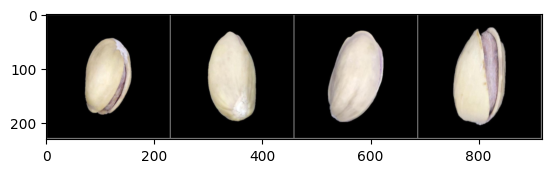

siirt siirt kirmiz siirt


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1 = nn.Linear(100352,128)
        self.fc2 = nn.Linear(128,len(classes))


    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = CNN()

In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

for epoch in range(5):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i+1) % 430 == 0:
            print (f'Epoch [{epoch+1}/{10}], Step [{i+1}/ {len(trainloader)}], Loss: {loss.item():.4f}')

print('Finished Training')

Epoch [1/10], Step [430/ 430], Loss: 0.7230
Epoch [2/10], Step [430/ 430], Loss: 0.3645
Epoch [3/10], Step [430/ 430], Loss: 0.1368
Epoch [4/10], Step [430/ 430], Loss: 0.4752
Epoch [5/10], Step [430/ 430], Loss: 0.3674
Finished Training


In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the length test images: {100 * correct // total} %')

Accuracy of the network on the length test images: 84 %


In [21]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: kirmiz is 86.6 %
Accuracy for class: siirt is 82.0 %


In [23]:
# Saving and Testing the Model
# Save the trained model
torch.save(net.state_dict(), 'pistachio.pt')
print("Model saved.")

# Load the saved model
loaded_model = CNN()
loaded_model.load_state_dict(torch.load('pistachio.pt'))
loaded_model = loaded_model
loaded_model.eval()

Model saved.


<ipython-input-23-b54c2c6c0a9f>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('pistachio.pt'))


CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)

In [60]:
im = Image.open(r'/content/sample_data/7.jpg')
import torch
from torchvision import transforms
from PIL import Image
ttransform = transforms.Compose([transforms.Resize((227,227)),transforms.ToTensor()
                               ,transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)) ])
# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = Image.open(img_path)  # Load the image
    img_tensor = ttransform(img)  # Apply preprocessing
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension
    return img_tensor

# Path to your downloaded image
img_path = '/content/sample_data/6.jpg'

# Preprocess the image
preprocessed_image = load_and_preprocess_image(img_path)
# Pass the input image through the loaded model
with torch.no_grad():
    output = loaded_model(preprocessed_image)
# Get the predicted class
_, predicted_class = torch.max(output.data, 1)

# Map the predicted class index to the corresponding label
class_label_map = {0: 'kirmiz', 1: 'siirt'}
predicted_label = class_label_map[predicted_class.item()]
print('Predicted label:', predicted_label)




Predicted label: kirmiz
